In [355]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy import stats


In [356]:
#locating the dataset
pd.set_option('display.max_columns', None)

df_trustpilot = pd.read_csv('data/data_trustpilot.csv', engine='python')

df_trustpilot.head()


,username,number_reviews,location,rating,text,date_of_experience,date_posted,subject,hour_posted,day_of_week_posted,days_between_experience_and_post,verification
0,Margarita Orlova,1,CZ,5.0,I had the pleasure of working with Shelby Gibs...,2024-10-10,2024-10-17,Great customer service,10,3,7,1
1,Oran Whittington,1,US,5.0,The company rep I was working with made everyt...,2024-10-14,2024-10-15,Certified Crane and Rigging Services. The comp...,16,1,1,1
2,Cristen Gros,1,US,5.0,Ellie was GREAT! Super helpful with the design...,2024-10-15,2024-10-15,Ellie was GREAT!!,17,1,0,1
3,Mechelle Fields,1,US,5.0,My team member “Ellie’s’ worked with me throu...,2024-10-11,2024-10-12,Beautiful Red Coasters,3,5,1,1
4,Sarah Venturini,1,US,5.0,Rachel was amazing. She responded immediately ...,2024-10-10,2024-10-14,Rachel was amazing!!,17,0,4,1


In [357]:
#convert date_posted and date_of_experience to datetime

df_trustpilot['date_posted'] = pd.to_datetime(df_trustpilot['date_posted'])
df_trustpilot['date_of_experience'] = pd.to_datetime(df_trustpilot['date_of_experience'])

df_trustpilot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48933 entries, 0 to 48932
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   username                          48933 non-null  object        
 1   number_reviews                    48933 non-null  int64         
 2   location                          48933 non-null  object        
 3   rating                            48933 non-null  float64       
 4   text                              48933 non-null  object        
 5   date_of_experience                48933 non-null  datetime64[ns]
 6   date_posted                       48933 non-null  datetime64[ns]
 7   subject                           48933 non-null  object        
 8   hour_posted                       48933 non-null  int64         
 9   day_of_week_posted                48933 non-null  int64         
 10  days_between_experience_and_post  48933 non-nu

In [358]:
#Split set into numeric, categorical and datetime variables
#Provide statistical metrics for numeric variables

numeric_variables = df_trustpilot.select_dtypes(include = ['int', 'float'])
categorical_variables = df_trustpilot.select_dtypes(include=['object']) 
datetime_variables = df_trustpilot.select_dtypes(include=['datetime64'])

print("Numeric variables are: ", numeric_variables.columns)
print("Categorical variables are: ", categorical_variables.columns)
print("Datetime variables are: ", datetime_variables.columns)

print(numeric_variables.describe())


Numeric variables are:  Index(['number_reviews', 'rating', 'hour_posted', 'day_of_week_posted',
       'days_between_experience_and_post', 'verification'],
      dtype='object')
Categorical variables are:  Index(['username', 'location', 'text', 'subject'], dtype='object')
Datetime variables are:  Index(['date_of_experience', 'date_posted'], dtype='object')
       number_reviews        rating   hour_posted  day_of_week_posted  \
count    48933.000000  48933.000000  48933.000000        48933.000000   
mean         4.791797      3.517974     15.209164            2.576462   
std         12.363238      1.836672      5.941949            1.817341   
min          1.000000      1.000000      0.000000            0.000000   
25%          1.000000      1.000000     12.000000            1.000000   
50%          1.000000      5.000000     17.000000            2.000000   
75%          3.000000      5.000000     20.000000            4.000000   
max        592.000000      5.000000     23.000000        

In [359]:
#Upon review, it appears that the number_reviews, rating, hour_posted, day_of_week_posted and verification columns are fine and do not include faulty data. 
#However, the minimum value for the days_between_experience_and_post column is -1, which should not appear.
#We will further review days_between_experience_and_post.

negative_days = df_trustpilot[df_trustpilot['days_between_experience_and_post'] < 0]

print(negative_days)
print(len(negative_days))

#There is only one entry with negative days, which will be deleted

df_trustpilot = df_trustpilot[df_trustpilot['days_between_experience_and_post'] >= 0]

negative_days_after = df_trustpilot[df_trustpilot['days_between_experience_and_post'] < 0]
print(len(negative_days_after))


               username  number_reviews location  rating  \
17835     Ben Lancaster               3       AU     1.0   
33617           Belinda               2       GB     1.0   
34864    Jackie Garratt               1       AU     1.0   
35555  Kathleen Riddell               1       NZ     1.0   

                                                    text date_of_experience  \
17835  BE WARNED - stay far away from SteelSeries pro...         2024-07-04   
33617  I had a disappointing experience at Asda today...         2024-09-10   
34864  ASDA cancelled Mothers Day order.If I could gi...         2024-03-10   
35555  I ordered some pens for my cousin, added a bot...         2023-12-19   

      date_posted                                            subject  \
17835  2024-07-03  Cheap Products Designed To Break Outside Warranty   
33617  2024-09-09  I had a disappointing experience at the self s...   
34864  2024-03-09                  ASDA cancelled Mothers Day order.   
35555  2023-12-

In [360]:
#Check outcome of removing negative days
numeric_variables = df_trustpilot.select_dtypes(include = ['int', 'float'])
print("Minimum value for days_between_experience_and_post:")
print(df_trustpilot['days_between_experience_and_post'].min())

print("Summary statistics for numeric variables in the dataset:")
print(numeric_variables.describe())

Minimum value for days_between_experience_and_post:
0
Summary statistics for numeric variables in the dataset:
       number_reviews        rating   hour_posted  day_of_week_posted  \
count    48929.000000  48929.000000  48929.000000        48929.000000   
mean         4.792046      3.518179     15.208568            2.576529   
std         12.363710      1.836606      5.941821            1.817306   
min          1.000000      1.000000      0.000000            0.000000   
25%          1.000000      1.000000     12.000000            1.000000   
50%          1.000000      5.000000     17.000000            2.000000   
75%          3.000000      5.000000     20.000000            4.000000   
max        592.000000      5.000000     23.000000            6.000000   

       days_between_experience_and_post  verification  
count                      48929.000000  48929.000000  
mean                           1.978316      0.579125  
std                           41.565782      0.493705  
min    

In [361]:
#Calculating mode, mean and median for each numeric variable

for variable in numeric_variables:
    
    mode_value = df_trustpilot[variable].mode()[0]
    mode_count = df_trustpilot[variable].value_counts().iloc[0]
    
    mean_value = df_trustpilot[variable].mean()
    median_value = df_trustpilot[variable].median()
    
    print(f"\nAnalysis for {variable}:")
    if variable == 'rating':
        print(f"The most common rating is {mode_value}, appearing {mode_count} times")
        print(f"The mean rating is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")
    elif variable == 'number_reviews':
        print(f"The most common number of reviews is {mode_value}, appearing {mode_count} times")
        print(f"The mean number of reviews is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")
    elif variable == 'hour_posted':
        print(f"The most common hour of posting is {mode_value}, appearing {mode_count} times")
        print(f"The mean hour of posting is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")
    elif variable == 'day_of_week_posted':
        print(f"The most common day of posting is {mode_value}, appearing {mode_count} times")
        print(f"The mean day of posting is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")
    elif variable == 'days_between_experience_and_post':
        print(f"The most common number of days between experience and post is {mode_value}, appearing {mode_count} times")
        print(f"The mean number of days between experience and post is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")
    elif variable == 'verification':
        print(f"The most common verification status is {mode_value}, appearing {mode_count} times")
        print(f"The mean verification value is: {mean_value:.2f}")
        print(f"The median rating is: {median_value:.2f}")


Analysis for number_reviews:
The most common number of reviews is 1, appearing 28304 times
The mean number of reviews is: 4.79

Analysis for rating:
The most common rating is 5.0, appearing 27936 times
The mean rating is: 3.52

Analysis for hour_posted:
The most common hour of posting is 18, appearing 4280 times
The mean hour of posting is: 15.21

Analysis for day_of_week_posted:
The most common day of posting is 1, appearing 8824 times
The mean day of posting is: 2.58

Analysis for days_between_experience_and_post:
The most common number of days between experience and post is 0, appearing 44993 times
The mean number of days between experience and post is: 1.98

Analysis for verification:
The most common verification status is 1, appearing 28336 times
The mean verification value is: 0.58


In [362]:
#Calculate distribution of categorical variables

print("Categorical Variables Distribution:")
for col in categorical_variables.columns:
    if col not in ['text', 'subject']:  
        print(f"\n{col} distribution:")
        print(df_trustpilot[col].value_counts(normalize=True).head())

print("Day of Week Distribution:")
print(df_trustpilot['day_of_week_posted'].value_counts(normalize=True))


Categorical Variables Distribution:

username distribution:
username
Customer     0.004742
customer     0.002800
Chris        0.001982
Anonymous    0.001962
David        0.001901
Name: proportion, dtype: float64

location distribution:
location
US    0.489607
GB    0.353328
CA    0.030534
DE    0.017229
FR    0.009524
Name: proportion, dtype: float64
Day of Week Distribution:
day_of_week_posted
1    0.180343
2    0.173578
3    0.168714
4    0.155756
0    0.152854
5    0.092665
6    0.076090
Name: proportion, dtype: float64


In [363]:
#Calculate earliest and latest dates in dataset

print("Temporal variables distribution:")
for col in datetime_variables.columns:
    print(f"\n{col} range:")
    print(f"Earliest: {df_trustpilot[col].min()}")
    print(f"Latest: {df_trustpilot[col].max()}")

Temporal variables distribution:

date_of_experience range:
Earliest: 2009-01-15 00:00:00
Latest: 2024-10-22 00:00:00

date_posted range:
Earliest: 2009-01-15 00:00:00
Latest: 2024-10-22 00:00:00


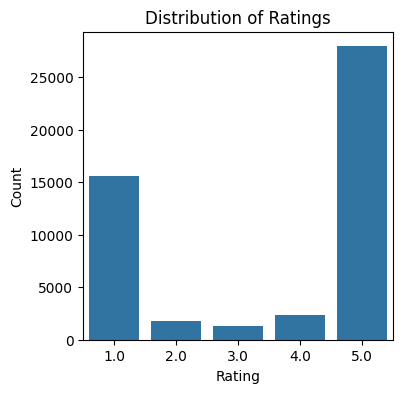

In [364]:
#Shows the distribution of rating
plt.figure(figsize=(4, 4))
sns.countplot(data=df_trustpilot, x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

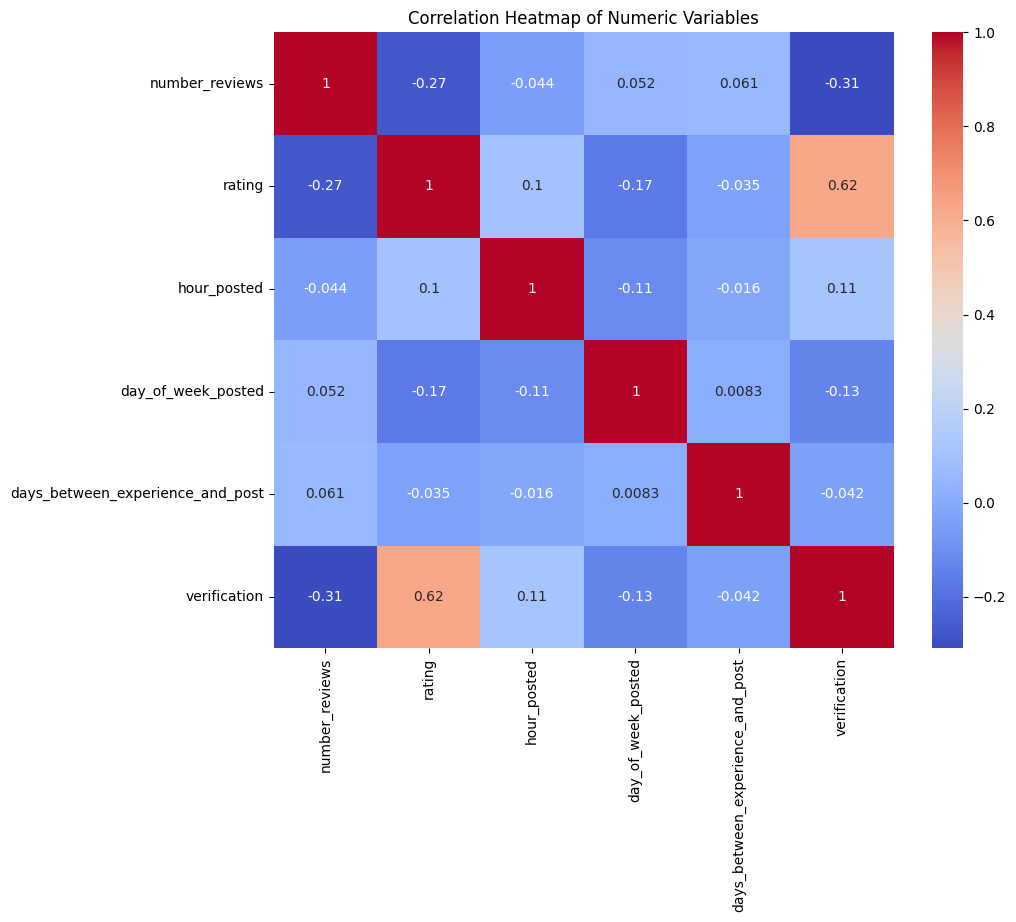

In [365]:
# Correlation heatmap for numeric variables

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_variables.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

#Based on the heatmap, the only strong correlation that exists among the numeric variables is between rating and verification.

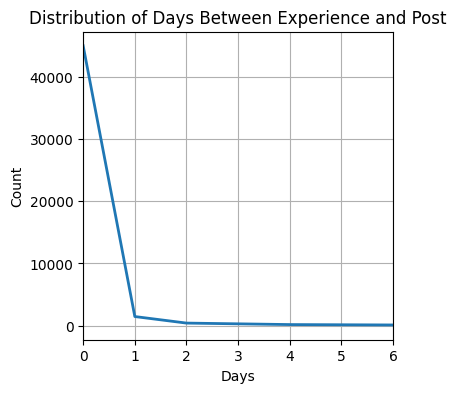

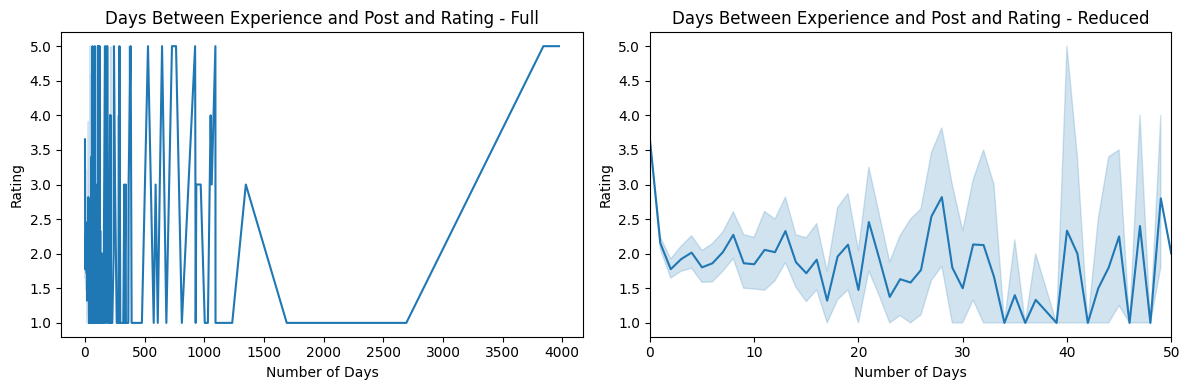

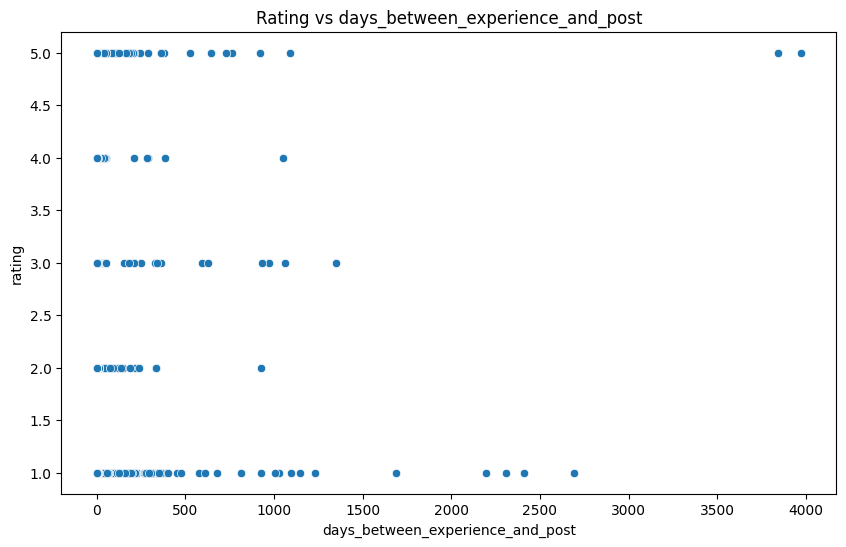

Correlation between rating and days_between_experience_and_post:
                                    rating  days_between_experience_and_post
rating                            1.000000                         -0.034919
days_between_experience_and_post -0.034919                          1.000000
The Pearson coefficient for the relationship between rating and days_between_experience_and_post is:  -0.03491875978776249
The Pearson p_value for the relationship between rating and days_between_experience_and_post is:  1.1084486021567158e-14
The Spearman coefficient for the relationship between rating and days_between_experience_and_post is:  -0.23882553047115815
The Spearman p_value for the relationship between rating and days_between_experience_and_post is:  0.0


In [366]:
#Next we examine the relationship between the target variable (rating) and the first numeric variable(days_between_experience_and_post)

# Distribution of days_between_experience_and_post
plt.figure(figsize=(4,4))
days_counts = df_trustpilot['days_between_experience_and_post'].value_counts().sort_index()
plt.plot(days_counts.index, days_counts.values, linewidth=2)
plt.title('Distribution of Days Between Experience and Post')
plt.xlabel('Days')
plt.ylabel('Count')
plt.xlim(0, 6)
plt.grid(True)
plt.show()

#Relationship between rating and days_between_experience_and_post
#Full Graph
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.lineplot(x='days_between_experience_and_post', y='rating', data=df_trustpilot)
plt.title('Days Between Experience and Post and Rating - Full')
plt.xlabel('Number of Days')
plt.ylabel('Rating')
#Reduced Graph
plt.subplot(1, 2, 2)
sns.lineplot(x='days_between_experience_and_post', y='rating', data=df_trustpilot)
plt.title('Days Between Experience and Post and Rating - Reduced')
plt.xlabel('Number of Days')
plt.ylabel('Rating')
plt.xlim(0, 50)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_trustpilot, x='days_between_experience_and_post', y='rating')
plt.title('Rating vs days_between_experience_and_post')
plt.show()
    
correlation = df_trustpilot[['rating', 'days_between_experience_and_post']].corr()
print("Correlation between rating and days_between_experience_and_post:")
print(correlation)

#Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'], normalize=1)

#Pearson correlation test to study the linear relationship between two quantitative variables
#H0: The two variables are uncorrelated
#H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'])

print("The Pearson coefficient for the relationship between rating and days_between_experience_and_post is: ", coeff)
print("The Pearson p_value for the relationship between rating and days_between_experience_and_post is: ", p_value)

# Pearson coefficient: -0.03491875978776249
#Negative sign indicates an inverse relationship but as the value is very close to 0, this indicates an extremely weak negative correlation, which is basically negligible.
# Pearson p_value: 1.1084486021567158e-14
#Value is very small and smaller than the common significance level of 0.05. This indicates that the correlation, athough very weak, is statistically significant.
# Despite statistical significance, the correlation is too weak to be meaningful for practical purposes

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['days_between_experience_and_post'])
print("The Spearman coefficient for the relationship between rating and days_between_experience_and_post is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and days_between_experience_and_post is: ", spearman_p_value)

# Spearman coefficient: -0.23882553047115815
#Negative sign indicates an inverse relationship but as the value is below -0.5, the correlation is weak to moderate. This indicates that a non-linear relationship exists and that as time increases between experience and posting, ratings tend to decrease.
# Spearman p_value: 0.0
#Value is significantly smaller than the common significance level of 0.05. This indicates that the correlation, athough very weak, is statistically significant.


# H0 is rejected
# H1 is confirmed
# The difference between Pearson (-0.035) and Spearman (-0.239) suggests a non-linear relationship
# People who wait longer to post reviews tend to give slightly lower ratings
# While statistically significant, the relationship is still relatively weak
# Keep for model training of a rating model


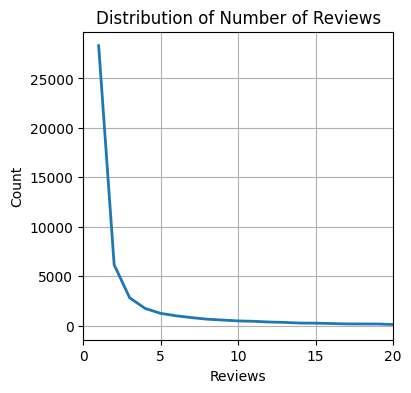

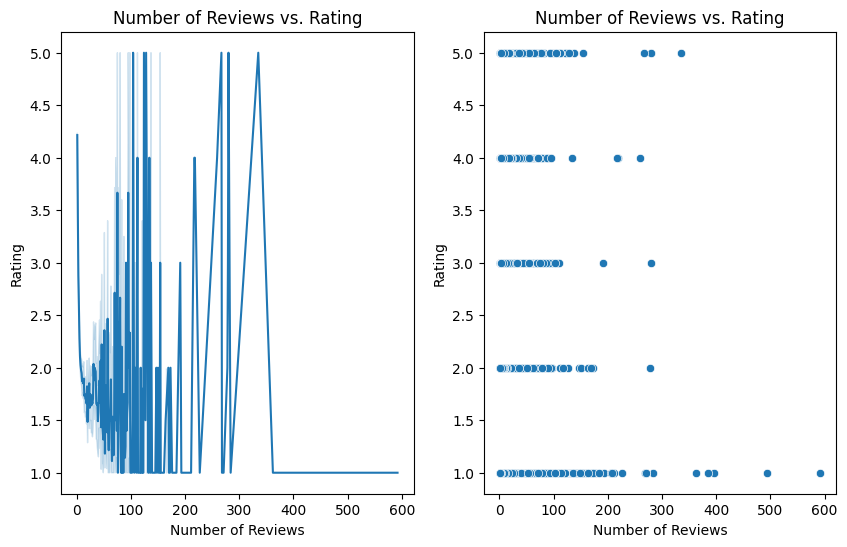

Correlation between rating and number_reviews:
                 rating  number_reviews
rating          1.00000        -0.27085
number_reviews -0.27085         1.00000
The Pearson coefficient for the relationship between rating and number_reviews is:  -0.27085044411097997
The Pearson p_value for the relationship between rating and number_reviews is:  0.0
The Spearman coefficient for the relationship between rating and number_reviews is:  -0.49171525764759877
The Spearman p_value for the relationship between rating and number_reviews is:  0.0


In [367]:
#Next we examine the relationship between the target variable (rating) and the second numeric variable (number_reviews)

# Distribution of number_reviews
plt.figure(figsize=(4,4))
number_counts = df_trustpilot['number_reviews'].value_counts().sort_index()
plt.plot(number_counts.index, number_counts.values, linewidth=2)  
plt.title('Distribution of Number of Reviews')
plt.xlabel('Reviews')
plt.ylabel('Count')
plt.xlim(0, 20)
plt.grid(True)
plt.show()

#Relationship between rating and number_reviews
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.lineplot(x='number_reviews', y='rating', data=df_trustpilot)
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.subplot(1,2,2)
sns.scatterplot(data=df_trustpilot, x='number_reviews', y='rating')
plt.title('Number of Reviews vs. Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()


correlation = df_trustpilot[['rating', 'number_reviews']].corr()
print("Correlation between rating and number_reviews:")
print(correlation)

# Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['number_reviews'], normalize=1)

# Pearson correlation test to study the linear relationship between two quantitative variables
# H0: The two variables are uncorrelated
# H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['number_reviews'])

print("The Pearson coefficient for the relationship between rating and number_reviews is: ", coeff)
print("The Pearson p_value for the relationship between rating and number_reviews is: ", p_value)

# Pearson coefficient: -0.27085044411097997
# Negative sign indicates an inverse relationship and the value indicates a weak to moderate linear relationship. 
# This indicates that as the number of reviews for a user incrases, ratings tend to decrease slighlty.
# Pearson p_value: 0.0
# Value is 0, which means that the correlation is statistically significant.

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['number_reviews'])
print("The Spearman coefficient for the relationship between rating and number_reviews is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and number_reviews is: ", spearman_p_value)

# Spearman coefficient: -0.49171525764759877
# Negative sign indicates an inverse relationship and the value indicates a moderate to strong monotonic relationship between the two variables.
# Spearman p_value: 0.0
# Value is 0, which means that the correlation is statistically significant.

# H0 is rejected
# H1 is confirmed
# The difference between Pearson (-0.28) and Spearman (-0.49) suggests a non-linear relationship
# People who submit more reviews tend to give lower ratings.
# Keep for model training of a rating model

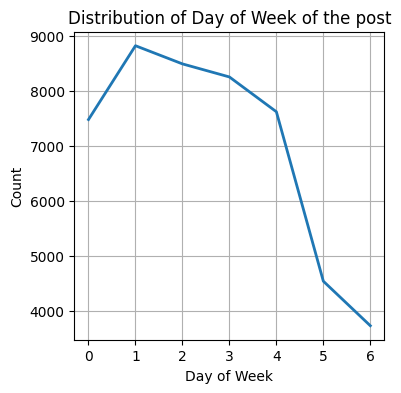

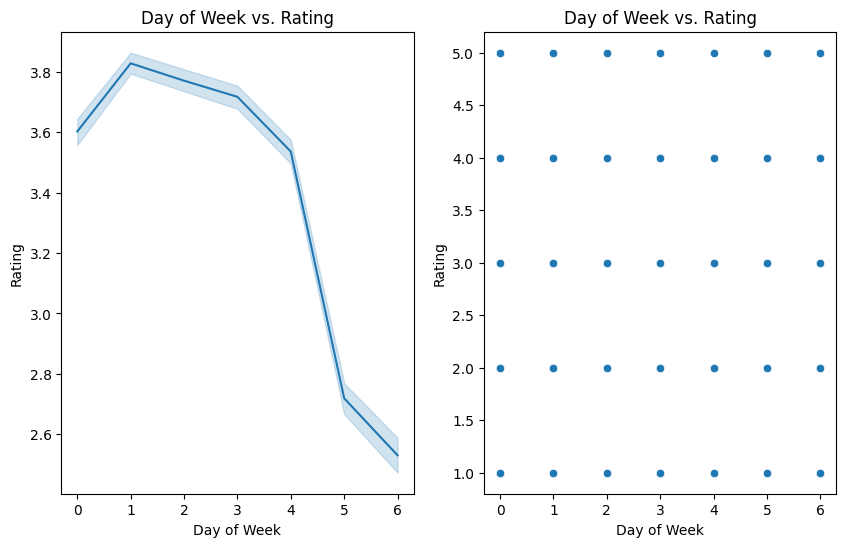

Correlation between rating and day_of_week_posted:
                      rating  day_of_week_posted
rating              1.000000           -0.169445
day_of_week_posted -0.169445            1.000000
The Pearson coefficient for the relationship between rating and day_of_week_posted is:  -0.16944485615623162
The Pearson p_value for the relationship between rating and day_of_week_posted is:  6.622488875946e-312
The Spearman coefficient for the relationship between rating and day_of_week_posted is:  -0.1581013968262789
The Spearman p_value for the relationship between rating and day_of_week_posted is:  2.602090303961772e-271


In [368]:
#Next we examine the relationship between the target variable (rating) and the third numeric variable (day_of_week_posted)

# Distribution of day_of_week_posted
plt.figure(figsize=(4,4))
day_counts = df_trustpilot['day_of_week_posted'].value_counts().sort_index()
plt.plot(day_counts.index, day_counts.values, linewidth=2)  
plt.title('Distribution of Day of Week of the post')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Relationship between rating and day_of_week_posted
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.lineplot(x='day_of_week_posted', y='rating', data=df_trustpilot)
plt.title('Day of Week vs. Rating')
plt.xlabel('Day of Week')
plt.ylabel('Rating')
plt.subplot(1,2,2)
sns.scatterplot(data=df_trustpilot, x='day_of_week_posted', y='rating')
plt.title('Day of Week vs. Rating')
plt.xlabel('Day of Week')
plt.ylabel('Rating')
plt.show()


correlation = df_trustpilot[['rating', 'day_of_week_posted']].corr()
print("Correlation between rating and day_of_week_posted:")
print(correlation)

# Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['day_of_week_posted'], normalize=1)

# Pearson correlation test to study the linear relationship between two quantitative variables
# H0: The two variables are uncorrelated
# H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['day_of_week_posted'])

print("The Pearson coefficient for the relationship between rating and day_of_week_posted is: ", coeff)
print("The Pearson p_value for the relationship between rating and day_of_week_posted is: ", p_value)

# Pearson coefficient: -0.16944485615623162
# Negative sign indicates an inverse relationship and the value indicates a weak linear relationship. 
# This indicates that as the week goes on, the rating decreases slightly.
# Pearson p_value: 6.622488875946e-312
# Value is very close to 0, which means that the correlation is statistically significant.

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['day_of_week_posted'])
print("The Spearman coefficient for the relationship between rating and day_of_week_posted is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and day_of_week_posted is: ", spearman_p_value)

# Spearman coefficient: -0.1581013968262789
# Negative sign indicates an inverse relationship and the value indicates a weak monotonic relationship between the two variables.
# Spearman p_value: 2.602090303961772e-271
# Value is very close to 0, which means that the correlation is statistically significant.

# H0 is rejected
# H1 is confirmed
# The difference between Pearson (-0.17) and Spearman (-0.16) is minimal and suggests a linear relationship
# There is a very weak tendency for ratings to decrease slightly as the week progresses, but the effect is minimal. 
# Keep for model training of a rating model

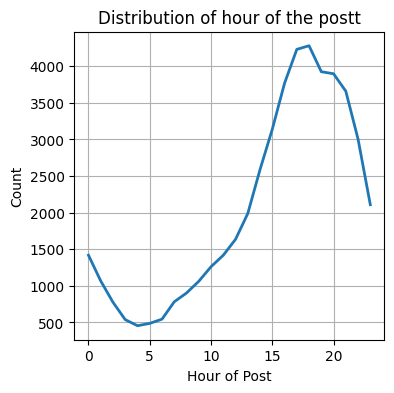

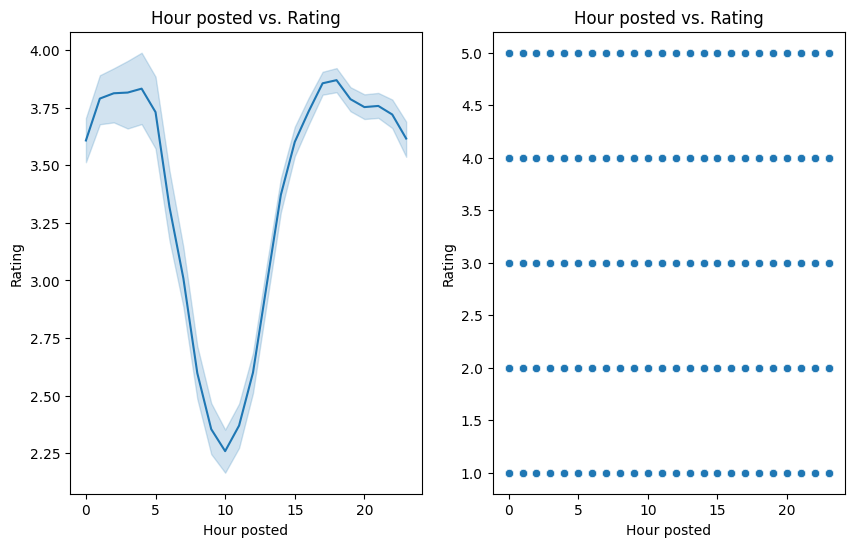

Correlation between rating and hour_posted:
               rating  hour_posted
rating       1.000000     0.100273
hour_posted  0.100273     1.000000
The Pearson coefficient for the relationship between rating and hour_posted is:  0.10027327443585209
The Pearson p_value for the relationship between rating and hour_posted is:  1.54644838836495e-109
The Spearman coefficient for the relationship between rating and hour_posted is:  0.1365062102414936
The Spearman p_value for the relationship between rating and hour_posted is:  3.8017897684341836e-202


In [369]:
#Next we examine the relationship between the target variable (rating) and the fourth numeric variable (hour_posted)

# Distribution of hour_posted
plt.figure(figsize=(4,4))
hour_counts = df_trustpilot['hour_posted'].value_counts().sort_index()
plt.plot(hour_counts.index, hour_counts.values, linewidth=2)  
plt.title('Distribution of hour of the postt')
plt.xlabel('Hour of Post')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Relationship between rating and hour_posted
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.lineplot(x='hour_posted', y='rating', data=df_trustpilot)
plt.title('Hour posted vs. Rating')
plt.xlabel('Hour posted')
plt.ylabel('Rating')
plt.subplot(1,2,2)
sns.scatterplot(data=df_trustpilot, x='hour_posted', y='rating')
plt.title('Hour posted vs. Rating')
plt.xlabel('Hour posted')
plt.ylabel('Rating')
plt.show()


correlation = df_trustpilot[['rating', 'hour_posted']].corr()
print("Correlation between rating and hour_posted:")
print(correlation)

# Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['hour_posted'], normalize=1)

# Pearson correlation test to study the linear relationship between two quantitative variables
# H0: The two variables are uncorrelated
# H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['hour_posted'])

print("The Pearson coefficient for the relationship between rating and hour_posted is: ", coeff)
print("The Pearson p_value for the relationship between rating and hour_posted is: ", p_value)

# Pearson coefficient: 0.10027327443585209
# The value indicates a weak positive linear relationship. 
# Pearson p_value: 1.54644838836495e-109
# Value is very close to 0, which means that the correlation is statistically significant.

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['hour_posted'])
print("The Spearman coefficient for the relationship between rating and hour_posted is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and hour_posted is: ", spearman_p_value)

# Spearman coefficient: 0.1365062102414936
# The value indicates a weak monotonic relationship between the two variables.
# Spearman p_value: 3.8017897684341836e-202
# Value is very close to 0, which means that the correlation is statistically significant.

# H0 is rejected
# H1 is confirmed
# There is a difference between Pearson (0.10) and Spearman (0.14) may be monotonous, not linear.
# There is a very weak tendency for ratings to increase slightly as the day progresses, but the effect is minimal. 
# The relationship appears stronger when considering ranked values (Spearman) rather than absolute values (Pearson)
# Keep for model training of a rating model

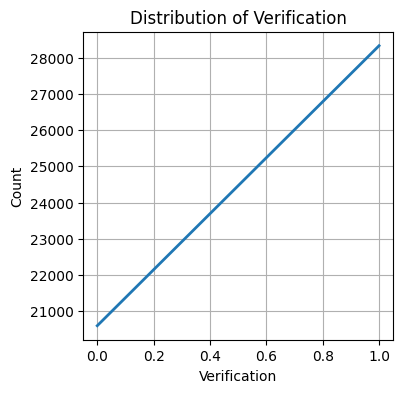

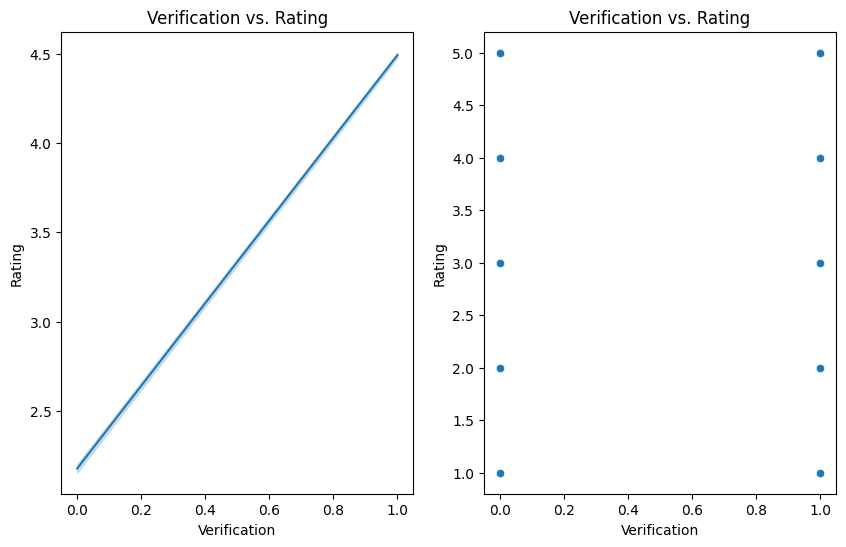

Correlation between rating and verification:
                rating  verification
rating        1.000000      0.621658
verification  0.621658      1.000000
The Pearson coefficient for the relationship between rating and verification is:  0.6216580567159748
The Pearson p_value for the relationship between rating and verification is:  0.0
The Spearman coefficient for the relationship between rating and verification is:  0.614853227230979
The Spearman p_value for the relationship between rating and verification is:  0.0


In [371]:
#Next we examine the relationship between the target variable (rating) and the fourth numeric variable (verification)

# Distribution of verification
plt.figure(figsize=(4,4))
verification_counts = df_trustpilot['verification'].value_counts().sort_index()
plt.plot(verification_counts.index, verification_counts.values, linewidth=2)  
plt.title('Distribution of Verification')
plt.xlabel('Verification')
plt.ylabel('Count')
plt.grid(True)
plt.show()

#Relationship between rating and verification
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.lineplot(x='verification', y='rating', data=df_trustpilot)
plt.title('Verification vs. Rating')
plt.xlabel('Verification')
plt.ylabel('Rating')
plt.subplot(1,2,2)
sns.scatterplot(data=df_trustpilot, x='verification', y='rating')
plt.title('Verification vs. Rating')
plt.xlabel('Verification')
plt.ylabel('Rating')
plt.show()


correlation = df_trustpilot[['rating', 'verification']].corr()
print("Correlation between rating and verification:")
print(correlation)

# Crosstab
pd.crosstab(df_trustpilot['rating'], df_trustpilot['verification'], normalize=1)

# Pearson correlation test to study the linear relationship between two quantitative variables
# H0: The two variables are uncorrelated
# H1: The two variables are correlated

coeff, p_value = pearsonr(df_trustpilot['rating'], df_trustpilot['verification'])

print("The Pearson coefficient for the relationship between rating and verification is: ", coeff)
print("The Pearson p_value for the relationship between rating and verification is: ", p_value)

# Pearson coefficient: 0.6216580567159748
# The value indicates a strong positive linear relationship. 
# Pearson p_value: 0.0
# Value is 0, which means that the correlation is statistically significant.

spearman_corr, spearman_p_value = stats.spearmanr(df_trustpilot['rating'], df_trustpilot['verification'])
print("The Spearman coefficient for the relationship between rating and verification is: ", spearman_corr)
print("The Spearman p_value for the relationship between rating and verification is: ", spearman_p_value)

# Spearman coefficient: 0.614853227230979
# The value indicates a strong monotonic relationship between the two variables.
# Spearman p_value: 0.0
# Value is 0, which means that the correlation is statistically significant.

# H0 is rejected
# H1 is confirmed
# There is a very small difference between Pearson (0.62) and Spearman (0.61), indicating that the relationship is linear.
# When the likelihood of a user being verified increases, the ratings they give tend to be higher as well.
# Keep for model training of a rating model



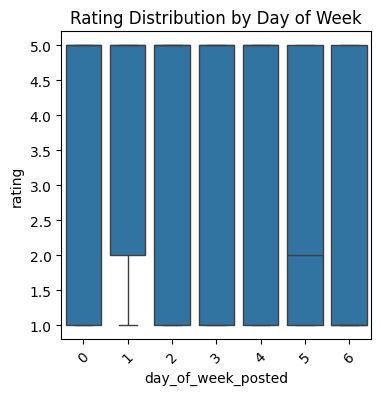

In [373]:
#shows the rating distribution by day of week

plt.figure(figsize=(4, 4))
sns.boxplot(data=df_trustpilot, x='day_of_week_posted', y='rating')
plt.title('Rating Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()

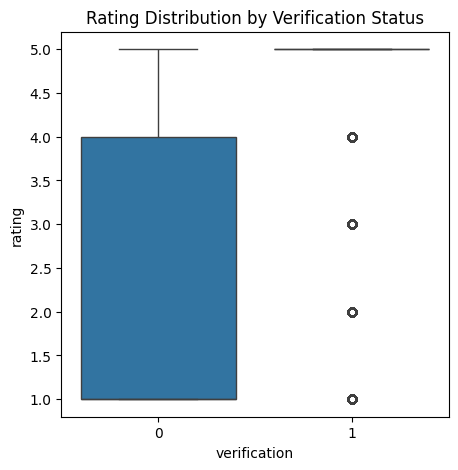

In [331]:
# Rating distribution by verification status

plt.figure(figsize=(5, 5))
sns.boxplot(data=df_trustpilot, x='verification', y='rating')
plt.title('Rating Distribution by Verification Status')
plt.show()

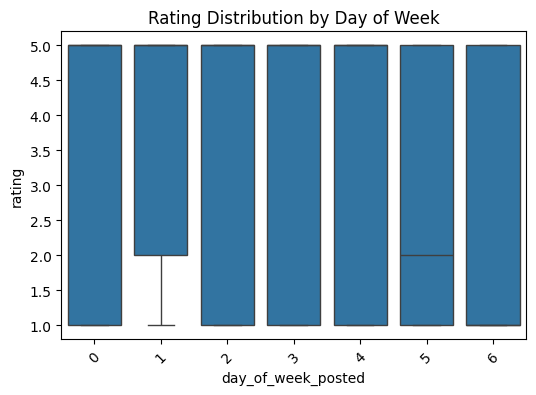

In [332]:
# Rating by day of week
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_trustpilot, x='day_of_week_posted', y='rating')
plt.title('Rating Distribution by Day of Week')
plt.xticks(rotation=45)
plt.show()


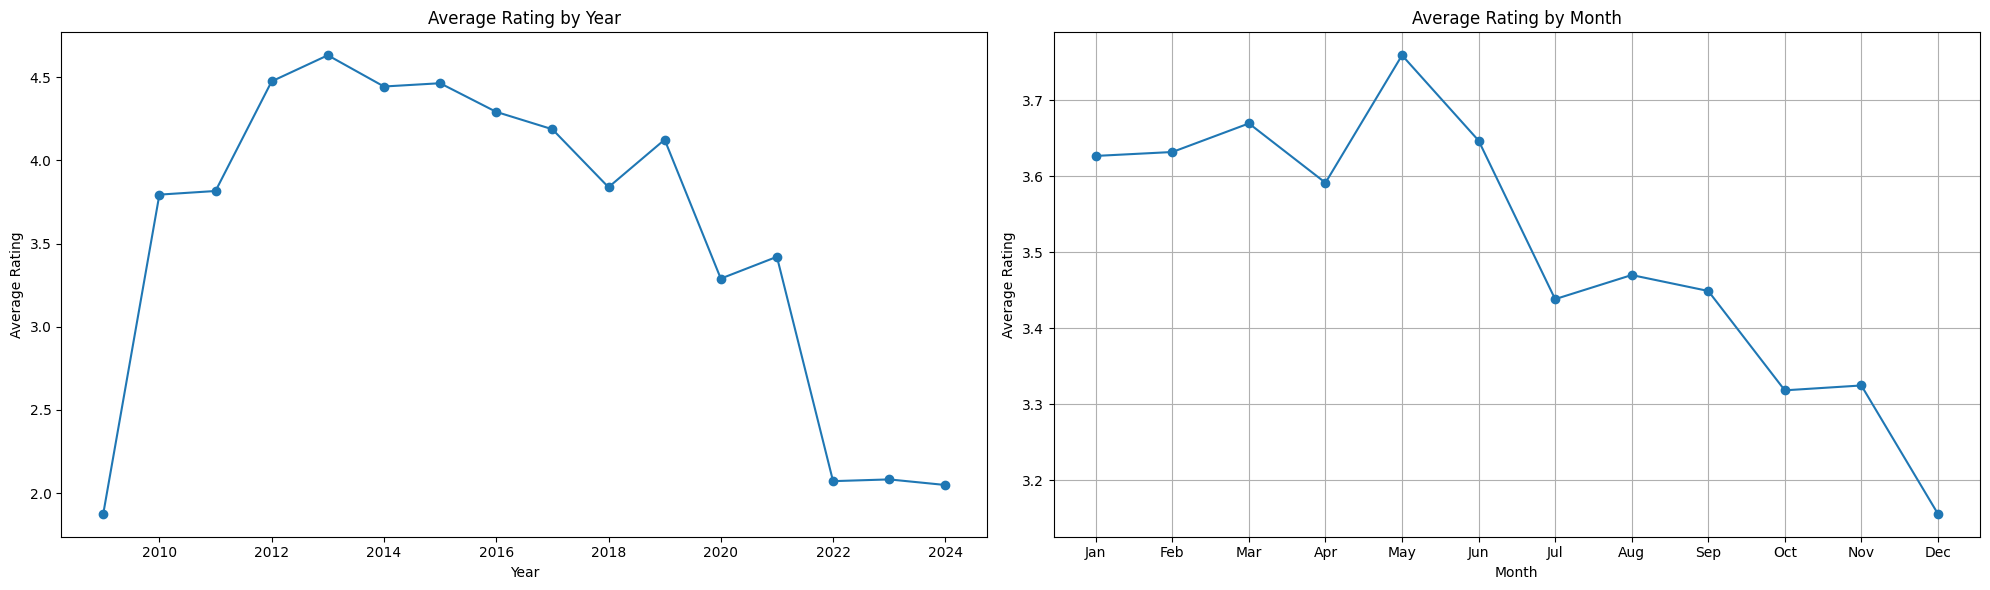


Yearly Average Ratings:
date_posted
2009    1.875000
2010    3.794521
2011    3.816327
2012    4.475761
2013    4.632653
2014    4.444745
2015    4.464453
2016    4.292188
2017    4.187657
2018    3.839085
2019    4.125113
2020    3.289464
2021    3.420611
2022    2.071377
2023    2.081790
2024    2.048193
Name: rating, dtype: float64

Monthly Average Ratings:
date_posted
1     3.626719
2     3.631865
3     3.669462
4     3.591385
5     3.759142
6     3.646917
7     3.438319
8     3.470015
9     3.449070
10    3.318343
11    3.324734
12    3.155924
Name: rating, dtype: float64


In [333]:
# Create figure with two subplots side by side
plt.figure(figsize=(20, 6))

# Yearly average rating
plt.subplot(1, 2, 1)
yearly_avg = df_trustpilot.groupby(df_trustpilot['date_posted'].dt.year)['rating'].mean()
yearly_avg.plot(marker='o')
plt.title('Average Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')

# Monthly average rating
plt.subplot(1, 2, 2)
monthly_avg = df_trustpilot.groupby(df_trustpilot['date_posted'].dt.month)['rating'].mean()
monthly_avg.plot(marker='o')
plt.title('Average Rating by Month')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.grid(True)

plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()  
plt.show()

print("\nYearly Average Ratings:")
print(yearly_avg)
print("\nMonthly Average Ratings:")
print(monthly_avg)

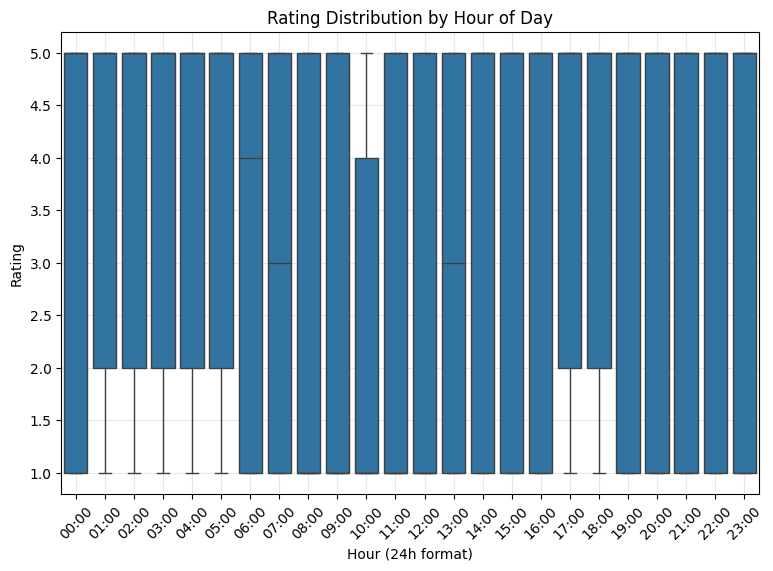

Hourly Statistics:
      mean  count
hour             
0     3.61   1418
1     3.79   1066
2     3.81    775
3     3.82    538
4     3.83    455
5     3.73    487
6     3.32    545
7     3.01    782
8     2.60    902
9     2.35   1062
10    2.26   1261
11    2.37   1418
12    2.60   1635
13    2.99   1988
14    3.37   2588
15    3.60   3139
16    3.73   3767
17    3.86   4230
18    3.87   4280
19    3.79   3925
20    3.75   3897
21    3.76   3659
22    3.72   3004
23    3.62   2108


In [334]:
# Rating distribution by hour

df_trustpilot['hour'] = df_trustpilot['hour_posted'].astype(str).str[:2].astype(int)
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_trustpilot, x='hour', y='rating')
plt.title('Rating Distribution by Hour of Day')
plt.xlabel('Hour (24h format)')
plt.ylabel('Rating')
plt.xticks(range(24), [f'{i:02d}:00' for i in range(24)], rotation=45)  
plt.grid(True, alpha=0.3)
plt.show()

hourly_stats = df_trustpilot.groupby('hour')['rating'].agg(['mean', 'count']).round(2)
print("Hourly Statistics:")
print(hourly_stats)

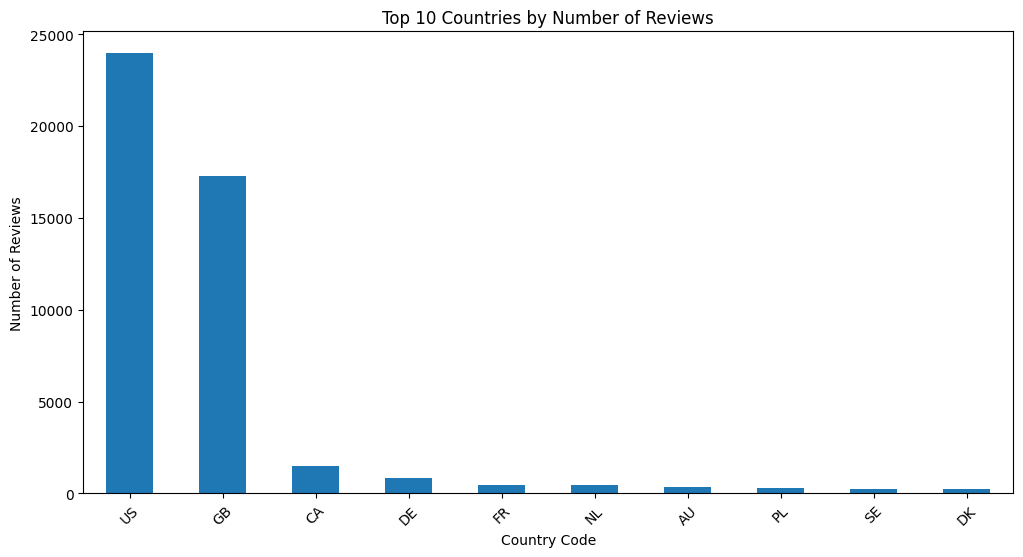

In [335]:
# Location analysis (top 10 countries)

plt.figure(figsize=(12, 6))
df_trustpilot['location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by Number of Reviews')
plt.xlabel('Country Code')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

<Figure size 800x800 with 0 Axes>

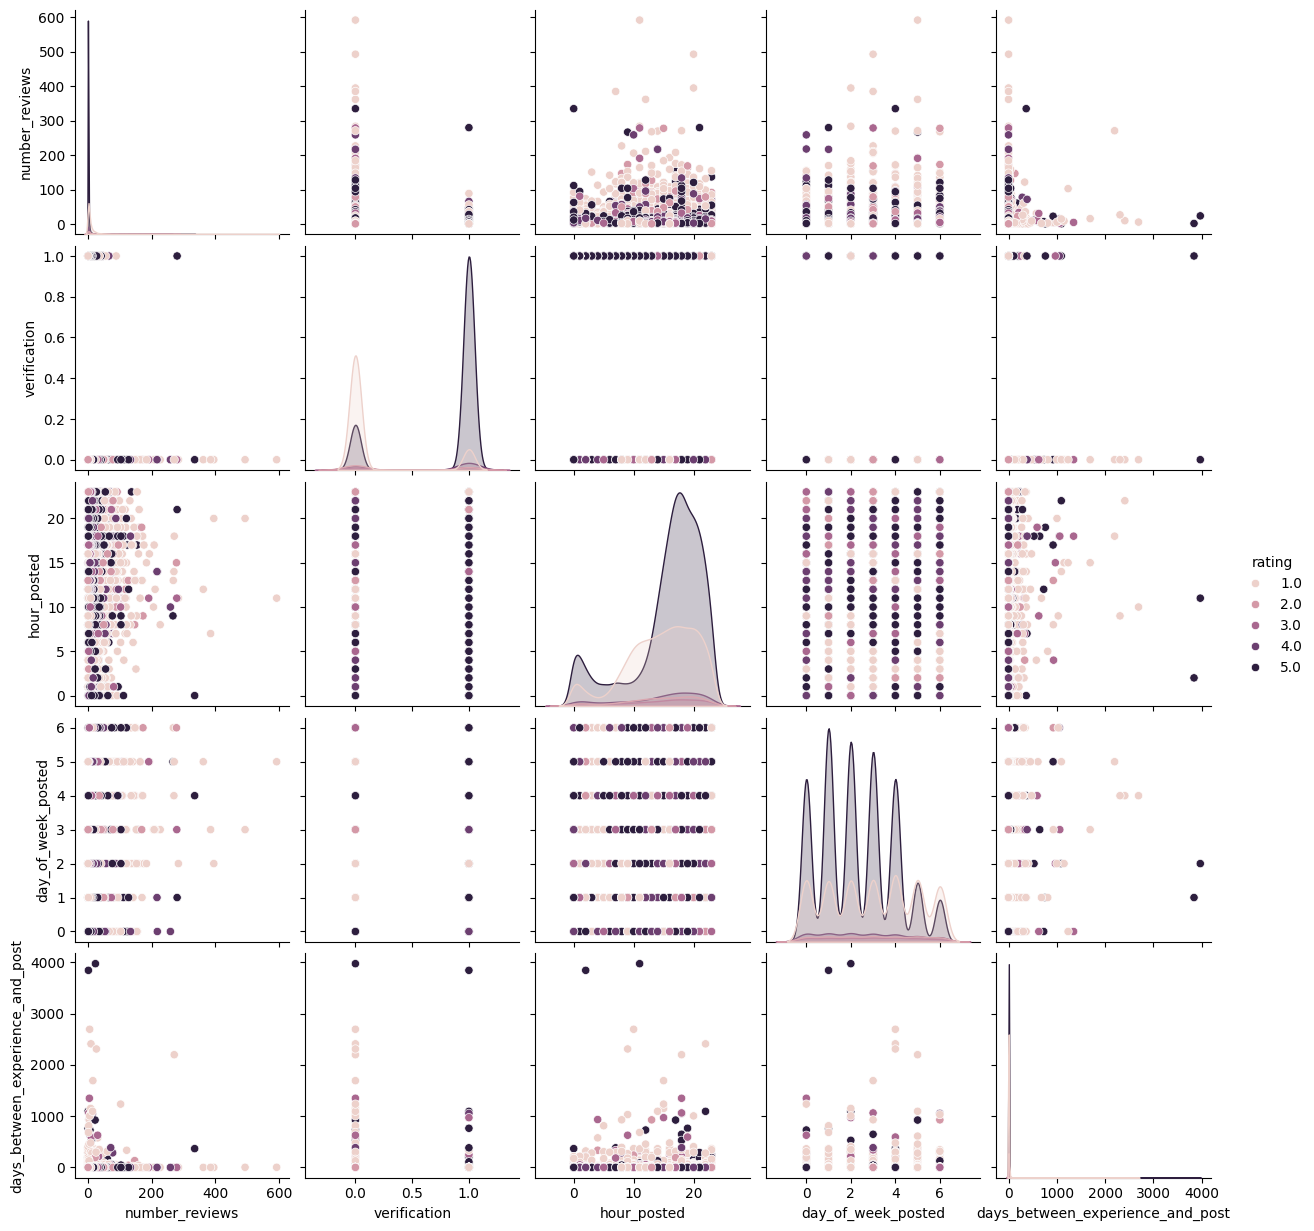

In [336]:
plt.figure(figsize=(8, 8))
sns.pairplot(data=df_trustpilot[['number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'verification', 'subject',
       'hour_posted', 'day_of_week_posted',
       'days_between_experience_and_post']], hue='rating', diag_kind='kde')
plt.show()

In [337]:
print(df_trustpilot.columns)

Index(['username', 'number_reviews', 'location', 'rating', 'text',
       'date_of_experience', 'date_posted', 'subject', 'hour_posted',
       'day_of_week_posted', 'days_between_experience_and_post',
       'verification', 'hour'],
      dtype='object')


/var/folders/fj/_k57h65963x0q_bf6vpz8cym0000gn/T/ipykernel_47813/3069507826.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='rating', data=df_filtered,
/var/folders/fj/_k57h65963x0q_bf6vpz8cym0000gn/T/ipykernel_47813/3069507826.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='location', y='rating', data=df_filtered,


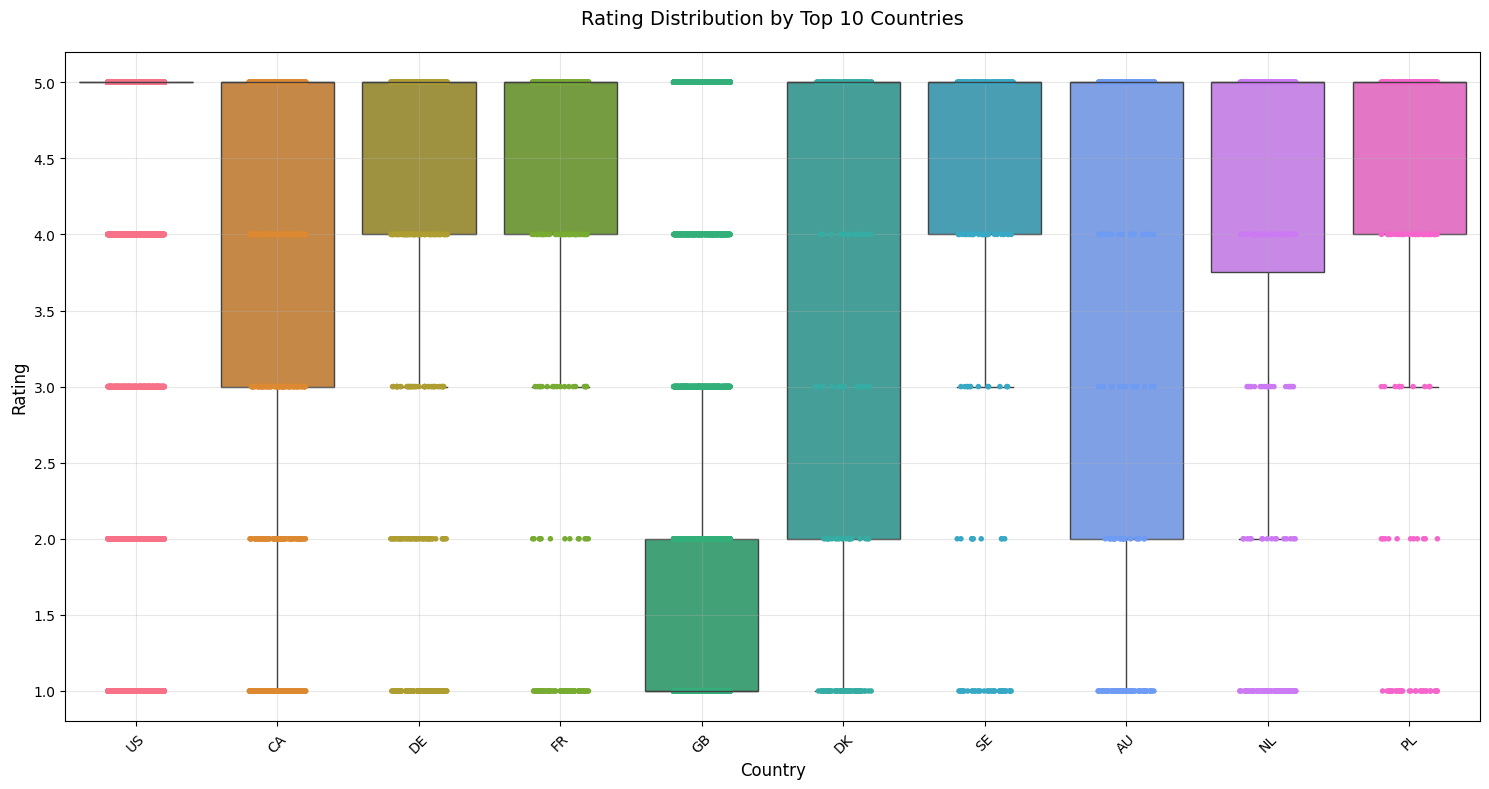

Summary Statistics by Country:
          count  mean  median   std
location                           
AU          331  3.78     5.0  1.69
CA         1494  3.86     5.0  1.57
DE          843  4.10     5.0  1.44
DK          258  3.62     5.0  1.69
FR          466  4.13     5.0  1.46
GB        17288  1.77     1.0  1.45
NL          432  4.00     5.0  1.52
PL          293  4.25     5.0  1.37
SE          261  4.09     5.0  1.47
US        23956  4.64     5.0  1.04


In [338]:
# Get top 10 countries
top_countries = df_trustpilot['location'].value_counts().head(10).index

df_filtered = df_trustpilot[df_trustpilot['location'].isin(top_countries)]
colors = sns.color_palette("husl", n_colors=len(top_countries))

plt.figure(figsize=(15, 8))

# Create boxplot 
sns.boxplot(x='location', y='rating', data=df_filtered,
            palette=colors,
            boxprops={'zorder': 1}, 
            showfliers=False)  

# Add stripplot on top
sns.stripplot(x='location', y='rating', data=df_filtered,
              palette=colors,  
              size=4,  
              jitter=0.2,  
              zorder=2)  


plt.title('Rating Distribution by Top 10 Countries', fontsize=14, pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("Summary Statistics by Country:")
print(df_filtered.groupby('location')['rating'].agg(['count', 'mean', 'median', 'std']).round(2))